In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as sns
import re
import pickle
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('//content/twitter_training.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


RENAMING THE COLUMNS

In [3]:
df.columns = ['Id', 'Category', 'Target', 'Tweet']


CHECKING THE COLUMNS NAME


In [4]:
df.head()

,Id,Category,Target,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


CHECKING THE DATASET'S DIMENSION

In [5]:
df.shape

(74681, 4)

INSPECTION OF DATASET

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        74681 non-null  int64 
 1   Category  74681 non-null  object
 2   Target    74681 non-null  object
 3   Tweet     73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
df.isnull().sum()

,0
Id,0
Category,0
Target,0
Tweet,686


CLEANING THE DATASET

In [9]:
# Drop rows with null values in the 'text' column
df= df.dropna(subset=['Tweet'])

# Reset the index after dropping rows
df = df.reset_index(drop=True)

# Display the updated DataFrame and the new shape
print(df.head())
print(f"Shape of data after dropping null values: {df.shape}")

     Id     Category    Target  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               Tweet  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  
Shape of data after dropping null values: (73995, 4)


ANALYZING THE SENTIMENT DISTRIBUTION

In [10]:
df['Target'].value_counts()


,count
Target,
Negative,22358
Positive,20654
Neutral,18108
Irrelevant,12875


Visualizing Sentiment Distribution

In [11]:
# Count the occurrences of each sentiment category
sentiment_counts = df["Target"].value_counts().reset_index()
sentiment_counts.columns = ["Sentiment", "Count"]

# Create a bar plot using Plotly
fig = px.bar(sentiment_counts, x="Sentiment", y="Count", color="Sentiment",
             color_discrete_map={"Positive": "green", "Negative": "red", "Irrelevant": "gray"},
             title="Count of Positive, Negative, Neutral and Irrelevant Tweets")

# Show the plot
fig.show()

 Analyzing Tweet Lengths

In [12]:
# Convert text column to string and handle NaN values
df["Tweet"] = df["Tweet"].astype(str)

# Calculate tweet length
df["Length"] = df["Tweet"].apply(len)

# Calculate average tweet length per sentiment
avg_length_by_sentiment = df.groupby('Target')['Length'].mean().reset_index()

# Create a bar chart to show average tweet length by sentiment
fig = px.bar(avg_length_by_sentiment,
             x="Target",
             y="Length",
             color="Target",
             color_discrete_map={"Positive": "green", "Negative": "red", "Irrelevant": "gray", "Neutral": "blue"},
             title="Average Tweet Length by Sentiment",
             labels={"target": "Sentiment", "Length": "Average Tweet Length"})

# Show the plot
fig.show()

Visualizing Sentiment through Word Clouds

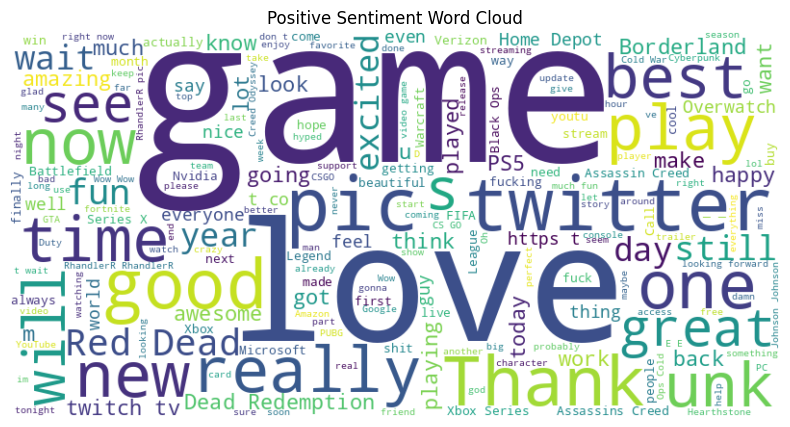

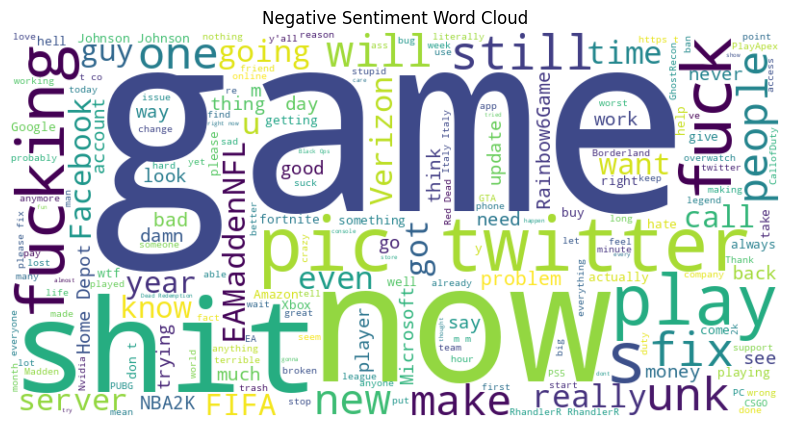

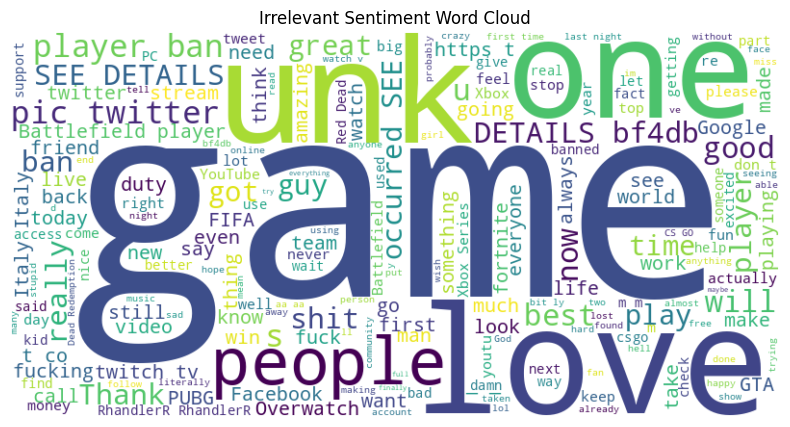

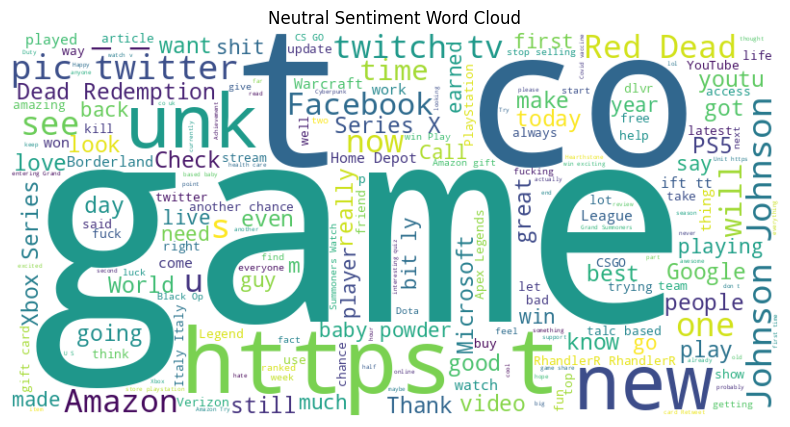

In [13]:
# Filter data based on sentiment categories
positive_tweets = df[df['Target'] == 'Positive']['Tweet']
negative_tweets = df[df['Target'] == 'Negative']['Tweet']
irrelevant_tweets = df[df['Target'] == 'Irrelevant']['Tweet']
neutral_tweets = df[df['Target'] == 'Neutral']['Tweet']

# Combine all tweets into a single string for each sentiment category
positive_text = " ".join(positive_tweets)
negative_text = " ".join(negative_tweets)
irrelevant_text = " ".join(irrelevant_tweets)
neutral_text = " ".join(neutral_tweets)

# Generate word clouds for each category
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


# Create word clouds for each sentiment
generate_wordcloud(positive_text, "Positive Sentiment Word Cloud")
generate_wordcloud(negative_text, "Negative Sentiment Word Cloud")
generate_wordcloud(irrelevant_text, "Irrelevant Sentiment Word Cloud")
generate_wordcloud(neutral_text, "Neutral Sentiment Word Cloud")

Removing Unwanted Words Stopwords

In [14]:
# Download the stopwords resource
nltk.download('stopwords')

# Get the list of stopwords for English
stop_words = stopwords.words('english')

# Print the list of stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


 Cleaning and Stemming the Text

In [15]:
port_stem = PorterStemmer()
# Function to clean and stem text
def clean_text(text):
    if isinstance(text, float):  # Check if the text is NaN (float)
        text = " "  # Assign a space if NaN

    # Clean the text by removing non-alphabetical characters and converting to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()

    # Split the text into words
    words = text.split()

    # Remove stopwords and apply stemming
    words = [port_stem.stem(word) for word in words if word not in stop_words]

    # Join the words back into a string with spaces
    cleaned_text = ' '.join(words)

    return cleaned_text
    # Example usage with a DataFrame (assuming df is your DataFrame with a 'Tweet' column)
df['Filter_Tweet'] = df['Tweet'].apply(clean_text)

Splitting the Data

In [16]:
#Splitting the data
X = df['Filter_Tweet'].values
Y = df['Target'].values
print(X)
print(Y)

['come border kill' 'im get borderland kill' 'im come borderland murder'
 ... 'realiz window partit mac year behind nvidia driver idea notic'
 'realiz window partit mac like year behind nvidia driver car fuck idea ever notic'
 'like window partit mac like year behind driver idea notic']
['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']


 Splitting into Training and Testing Sets

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size=0.2 , random_state=2)
print(X.shape , X_train.shape , X_test.shape)
# print(X_train)
print(X_test)

(73995,) (59196,) (14799,)
['odyssey murder creed'
 'offici microsoft surfac go price deal februari max griffith techradar secur rp zxk'
 'score horrif vision stormwind achiev' ...
 'csgo said someth coach still cheat oh noth els'
 'get lot red dead redeempt right game allow lot stupid thing gener idiot'
 'latest clip great song slumberjack jon ra']


Converting Text to Numbers

In [18]:
# Converting the textual data into numerical data using TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer (don't fit again on test data)
X_test = vectorizer.transform(X_test)

# Print the transformed test data
print(X_train)
print(X_test)

  (0, 8813)	0.25726668792231316
  (0, 19727)	0.3283780166992309
  (0, 8043)	0.35286389926396267
  (0, 17149)	0.2329155783794114
  (0, 14077)	0.3626879710658127
  (0, 14698)	0.2690232090316522
  (0, 12746)	0.18314344224919218
  (0, 3133)	0.23634425676941287
  (0, 13803)	0.14473625688377156
  (0, 5849)	0.16891249706695935
  (0, 3315)	0.11338756610878972
  (0, 13346)	0.3818155287623135
  (0, 16978)	0.3818155287623135
  (1, 13803)	0.11326455704854185
  (1, 3315)	0.08873237934042712
  (1, 19203)	0.3985856493191863
  (1, 14821)	0.1477325678477612
  (1, 6846)	0.2651425971178981
  (1, 19194)	0.17075749419604397
  (1, 16035)	0.24177302233114997
  (1, 16184)	0.18227001570196694
  (1, 7768)	0.1886944229296642
  (1, 8423)	0.16083628788512616
  (1, 10698)	0.18566416861437465
  (1, 5672)	0.1536440282919227
  :	:
  (59194, 514)	0.1138752538645567
  (59194, 21257)	0.12621129715163854
  (59194, 14345)	0.1784916588606225
  (59194, 10362)	0.17241112403687076
  (59194, 7275)	0.2038865052331911
  (59194, 6

Training the Model

In [19]:
# Training the Machine Learning Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

 Evaluating the Model's Performance

In [20]:
# Accuracy Score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

# Accuracy Score on test data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)

# Print the results with clearer labels
print(f"Accuracy Score on Training Data: {training_data_accuracy:.4f}")
print(f"Accuracy Score on Testing Data: {testing_data_accuracy:.4f}")

Accuracy Score on Training Data: 0.8339
Accuracy Score on Testing Data: 0.7726


In [23]:
# Select a test sample for prediction
X_new = X_test[200]
Y_actual = Y_test[200]
print("Actual Sentiment:", Y_actual)


Actual Sentiment: Positive
